In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
df_athlete = pd.read_csv(r"athlete_events.csv")
df_athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
# Getting the general information about the dataset
print(df_athlete.shape)
df_athlete.info()

(271116, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
df_athlete.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [5]:
# Checking for the missing values
df_athlete.isnull().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
dtype: bool

In [6]:
df_athlete.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [7]:
df_athlete_copy = df_athlete.copy()

# handling missing values
df_athlete['Age'].fillna(df_athlete['Age'].mean(), inplace=True)
df_athlete['Height'].fillna(df_athlete['Height'].mean(), inplace=True)
df_athlete['Weight'].fillna(df_athlete['Weight'].mean(), inplace=True)

In [8]:
# removing the rows with no medal
df_athlete.dropna(subset=['Medal'], inplace=True)
df_athlete.reset_index(drop=True, inplace=True)
df_athlete

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,15,Arvo Ossian Aaltonen,M,30.0,175.33897,70.702393,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,15,Arvo Ossian Aaltonen,M,30.0,175.33897,70.702393,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
3,16,Juhamatti Tapio Aaltonen,M,28.0,184.00000,85.000000,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
4,17,Paavo Johannes Aaltonen,M,28.0,175.00000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39778,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.00000,80.000000,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
39779,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.00000,80.000000,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
39780,135554,Bogusaw Zych,M,28.0,182.00000,82.000000,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze
39781,135563,Olesya Nikolayevna Zykina,F,19.0,171.00000,64.000000,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


In [9]:
# check duplicates
df_athlete[df_athlete.duplicated()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3086,12115,Gaston Frdric Blanchy,M,31.000000,175.33897,70.702393,Olle,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 2-3 Ton,Gold
5272,19874,Jean-Baptiste tienne August Charcot,M,23.000000,175.33897,70.702393,Quand-Mme-2,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 0-0.5 Ton,Silver
7965,29661,Jacques Doucet,M,25.556898,175.33897,70.702393,Favorite-1,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 2-3 Ton,Silver
9090,33564,William Edgar Exshaw,M,34.000000,175.33897,70.702393,Olle,GBR,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 2-3 Ton,Gold
11285,40973,Victor Auguste Godinet,M,47.000000,175.33897,70.702393,Favorite-1,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 2-3 Ton,Silver
19481,67525,Jacques le Lavasseur,M,25.556898,175.33897,70.702393,Olle,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 2-3 Ton,Gold
20352,70374,Robert Linzeler,M,28.000000,175.33897,70.702393,Quand-Mme-2,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 0-0.5 Ton,Silver
22981,79304,Mathias Joseph Ferdinand Jules Henri Mialaret,M,44.000000,175.33897,70.702393,Favorite-1,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 2-3 Ton,Silver
33818,116681,Henri Lon Victor Susse,M,55.000000,175.33897,70.702393,Favorite-1,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 2-3 Ton,Silver
34653,119448,Texier I,M,25.556898,175.33897,70.702393,Quand-Mme-2,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 0-0.5 Ton,Silver


In [10]:
# removing duplicates
df_athlete.drop_duplicates(keep='first', inplace=True)

In [11]:
df_athlete

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,15,Arvo Ossian Aaltonen,M,30.0,175.33897,70.702393,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,15,Arvo Ossian Aaltonen,M,30.0,175.33897,70.702393,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
3,16,Juhamatti Tapio Aaltonen,M,28.0,184.00000,85.000000,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
4,17,Paavo Johannes Aaltonen,M,28.0,175.00000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39778,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.00000,80.000000,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
39779,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.00000,80.000000,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
39780,135554,Bogusaw Zych,M,28.0,182.00000,82.000000,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze
39781,135563,Olesya Nikolayevna Zykina,F,19.0,171.00000,64.000000,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


## Exploratory Analysis

## Historical Medal Performance

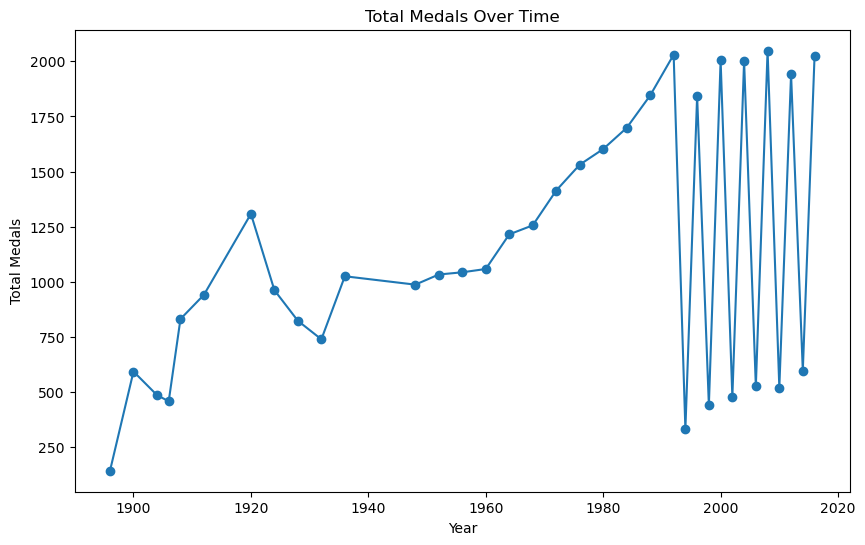

Int64Index([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
            1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
            1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
            2014, 2016],
           dtype='int64', name='Year')

In [12]:
yearly_totals = df_athlete.groupby('Year')['Medal'].count()
plt.figure(figsize=(10, 6))
plt.plot(yearly_totals.index, yearly_totals.values, marker='o')
plt.title('Total Medals Over Time')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.show()
yearly_totals.index

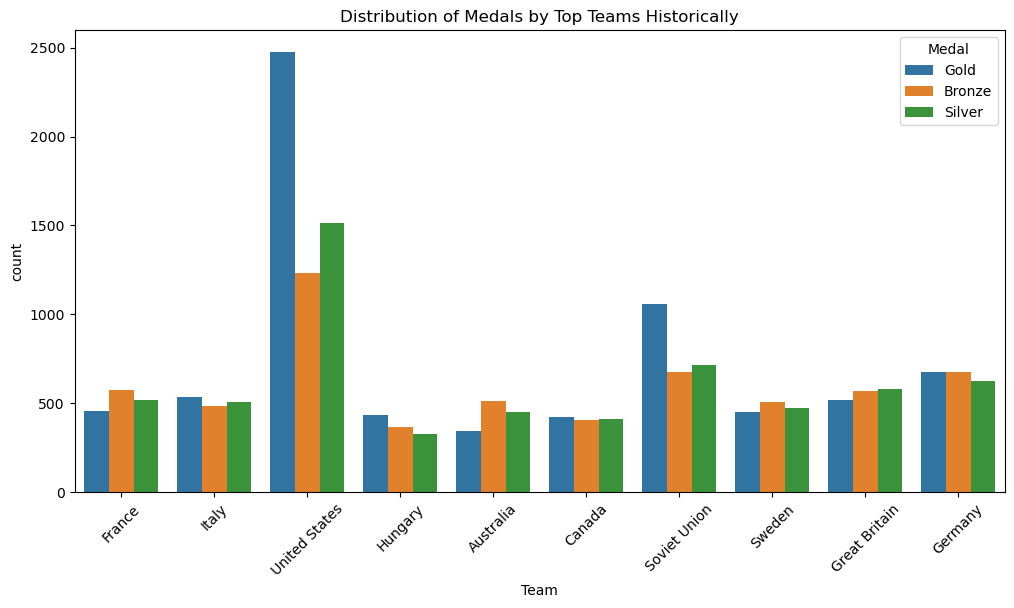

In [13]:
# Top teams with the most medals historically
top_teams_historical = df_athlete['Team'].value_counts().nlargest(10).index
df_top_teams_historical = df_athlete[df_athlete['Team'].isin(top_teams_historical)]
plt.figure(figsize=(12, 6))
sns.countplot(x='Team', hue='Medal', data=df_top_teams_historical)
plt.title('Distribution of Medals by Top Teams Historically')
plt.xticks(rotation=45)
plt.show()

## Current Medal Performance

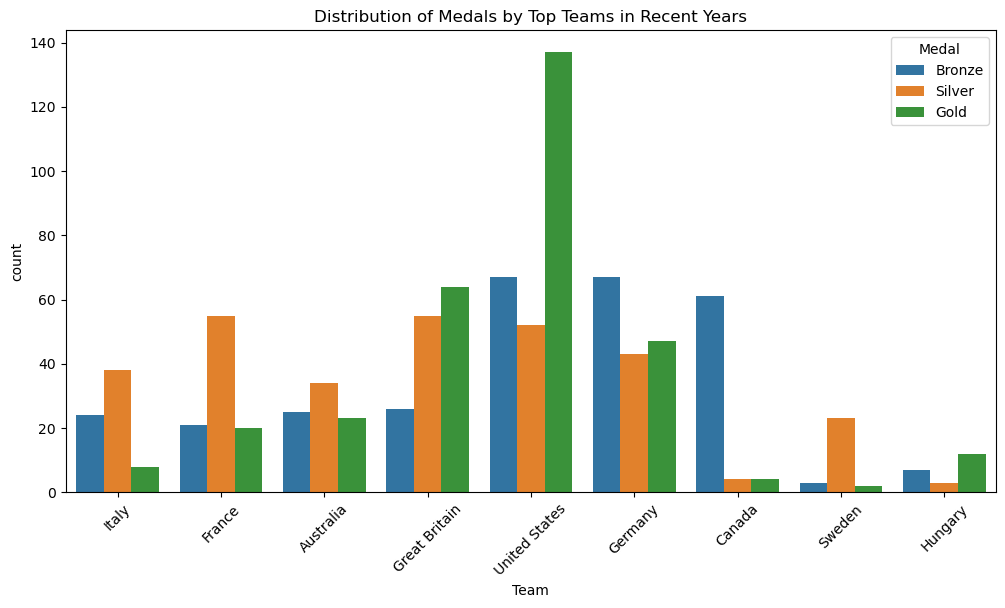

In [14]:
# Distribution of medals by top teams in recent years
top_teams_historical = df_athlete['Team'].value_counts().nlargest(10).index
recent_years_data_top_teams = df_athlete[(df_athlete['Year'] >= 2016) & (df_athlete['Team'].isin(top_teams_historical))]
plt.figure(figsize=(12, 6))
sns.countplot(x='Team', hue='Medal', data=recent_years_data_top_teams)
plt.title('Distribution of Medals by Top Teams in Recent Years')
plt.xticks(rotation=45)
plt.show()

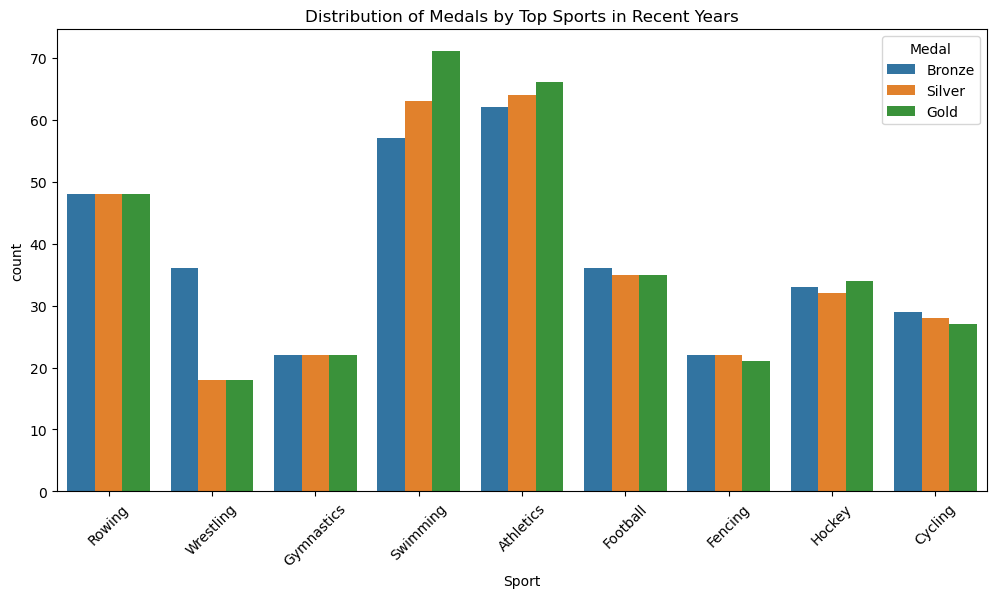

In [15]:
# Distribution of medals by top sports
top_sports_historical = df_athlete['Sport'].value_counts().nlargest(10).index
recent_years_data_top_sports = df_athlete[(df_athlete['Year'] >= 2016) & (df_athlete['Sport'].isin(top_sports_historical))]
plt.figure(figsize=(12, 6))
sns.countplot(x='Sport', hue='Medal', data=recent_years_data_top_sports)
plt.title('Distribution of Medals by Top Sports in Recent Years')
plt.xticks(rotation=45)
plt.show()

## Future potential success

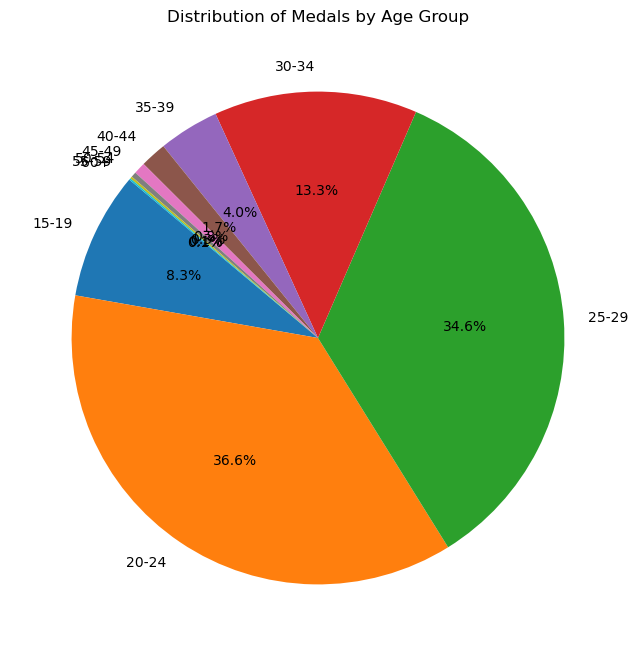

In [16]:
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 100]
labels = ['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60+']
df_athlete['AgeGroup'] = pd.cut(df_athlete['Age'], bins=bins, labels=labels, right=False)
medals_by_age_group = df_athlete.groupby('AgeGroup')['Medal'].count()
plt.figure(figsize=(8, 8))
plt.pie(medals_by_age_group, labels=medals_by_age_group.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Medals by Age Group')
plt.show()

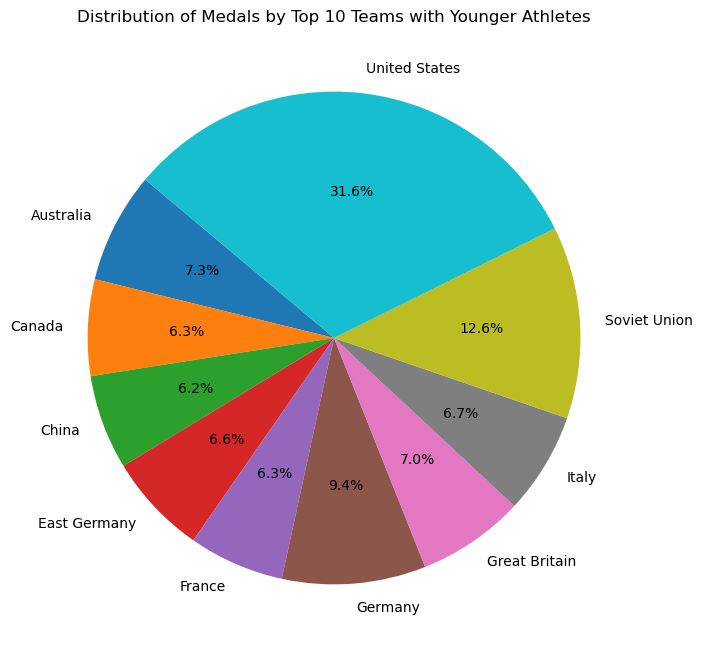

In [17]:
young_athletes_data = df_athlete[df_athlete['Age'] <= 25]
top_10_teams = young_athletes_data['Team'].value_counts().nlargest(10).index
young_athletes_data_top_10_teams = young_athletes_data[young_athletes_data['Team'].isin(top_10_teams)]
medals_by_team_young_athletes_top_10 = young_athletes_data_top_10_teams.groupby('Team')['Medal'].count()

plt.figure(figsize=(8, 8))
plt.pie(medals_by_team_young_athletes_top_10, labels=medals_by_team_young_athletes_top_10.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Medals by Top 10 Teams with Younger Athletes')
plt.show()

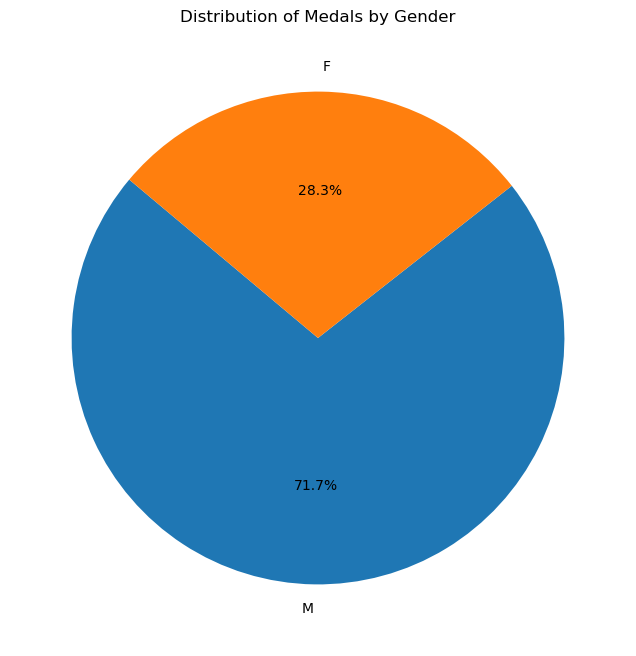

In [18]:
medals_by_gender = df_athlete['Sex'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(medals_by_gender, labels=medals_by_gender.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Medals by Gender')
plt.show()

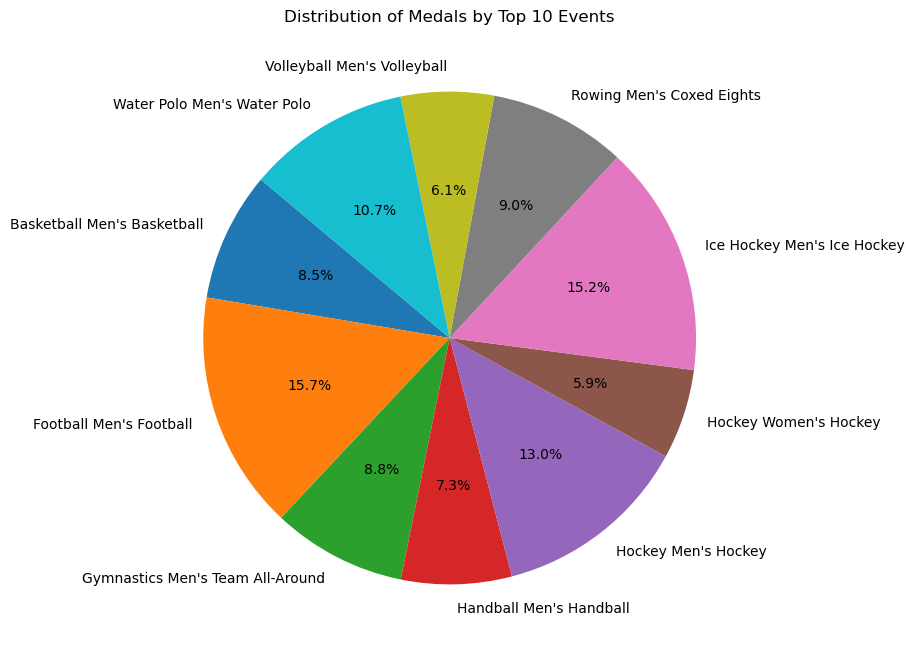

In [19]:
top_10_events = df_athlete['Event'].value_counts().nlargest(10).index

df_top_10_events = df_athlete[df_athlete['Event'].isin(top_10_events)]
medals_by_event_top_10 = df_top_10_events.groupby('Event')['Medal'].count()
plt.figure(figsize=(8, 8))
plt.pie(medals_by_event_top_10, labels=medals_by_event_top_10.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Medals by Top 10 Events')
plt.show()

In [20]:
df_athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,AgeGroup
0,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,30-34
1,15,Arvo Ossian Aaltonen,M,30.0,175.33897,70.702393,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,30-34
2,15,Arvo Ossian Aaltonen,M,30.0,175.33897,70.702393,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,30-34
3,16,Juhamatti Tapio Aaltonen,M,28.0,184.00000,85.000000,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,25-29
4,17,Paavo Johannes Aaltonen,M,28.0,175.00000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,25-29


## Data Cleaning

In [21]:
# List the columns
df_athlete.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'AgeGroup'],
      dtype='object')

In [22]:
irrelevant_cols=["ID", "Name", "Height", "Weight", "Season", "City"]
print(f'Before Removing Irrelevant Columns : {df_athlete.shape}')
df_athlete = df_athlete.drop(irrelevant_cols, axis=1)
print(f'After Removing Irrelevant Columns : {df_athlete.shape}')
df_athlete.head()

Before Removing Irrelevant Columns : (39772, 16)
After Removing Irrelevant Columns : (39772, 10)


,Sex,Age,Team,NOC,Games,Year,Sport,Event,Medal,AgeGroup
0,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,30-34
1,M,30.0,Finland,FIN,1920 Summer,1920,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,30-34
2,M,30.0,Finland,FIN,1920 Summer,1920,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,30-34
3,M,28.0,Finland,FIN,2014 Winter,2014,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,25-29
4,M,28.0,Finland,FIN,1948 Summer,1948,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,25-29


## One hot encoder

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
df_athlete['Medal'].fillna('No Medal', inplace=True)

encoder = OneHotEncoder(sparse=False, drop=None, categories='auto')  # 'drop' parameter is set to ignore the first category
medal_encoded = encoder.fit_transform(df_athlete[['Medal']])
medal_categories = encoder.get_feature_names_out(['Medal'])

df_athlete[medal_categories] = medal_encoded

df_athlete.head()

/Users/bikram/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Sex,Age,Team,NOC,Games,Year,Sport,Event,Medal,AgeGroup,Medal_Bronze,Medal_Gold,Medal_Silver
0,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,30-34,0.0,1.0,0.0
1,M,30.0,Finland,FIN,1920 Summer,1920,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,30-34,1.0,0.0,0.0
2,M,30.0,Finland,FIN,1920 Summer,1920,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,30-34,1.0,0.0,0.0
3,M,28.0,Finland,FIN,2014 Winter,2014,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,25-29,1.0,0.0,0.0
4,M,28.0,Finland,FIN,1948 Summer,1948,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,25-29,1.0,0.0,0.0


## Model Training and Evaluation

In [24]:
team_medals = df_athlete.groupby('Team').agg({
    'Medal_Gold': 'sum',
    'Medal_Silver': 'sum',
    'Medal_Bronze': 'sum'
}).reset_index()

df_athlete = pd.merge(df_athlete, team_medals, on='Team', how='left')

df_athlete.rename(columns={
    'Medal_Gold_y': 'Total_Gold_Medals',
    'Medal_Silver_y': 'Total_Silver_Medals',
    'Medal_Bronze_y': 'Total_Bronze_Medals'
}, inplace=True)

df_athlete.drop(['Medal_Gold_x', 'Medal_Silver_x', 'Medal_Bronze_x'], axis=1, inplace=True)


In [25]:
df_athlete['Total_Historical_Medals'] = df_athlete['Total_Gold_Medals'] + df_athlete['Total_Silver_Medals'] + df_athlete['Total_Bronze_Medals']

In [26]:
df_athlete['Total_Medal_Value'] =  df_athlete['Total_Gold_Medals']*3 + df_athlete['Total_Silver_Medals']*2 + df_athlete['Total_Bronze_Medals']

In [27]:
# Normalize the 'Total_Medal_Value' column between 0 and 1
df_athlete['Sponsorship'] = df_athlete['Total_Historical_Medals'] / df_athlete['Total_Historical_Medals'].max()
df_athlete['Sponsorship'] = df_athlete['Sponsorship'].clip(0, 1)

/var/folders/nl/mq6lrx555337t5yq69ftc0jr0000gn/T/ipykernel_6049/2075659913.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df_athlete.corr(), annot=True)


<Axes: >

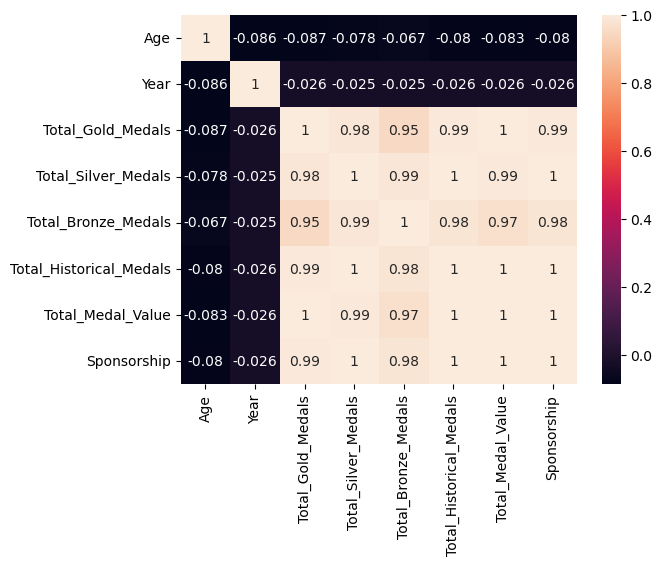

In [28]:
# Plot correlation matrix of remaining columns
sns.heatmap(data=df_athlete.corr(), annot=True)

In [29]:
df_athlete = df_athlete.groupby('Team').first().reset_index()
df_athlete.head()

,Team,Sex,Age,NOC,Games,Year,Sport,Event,Medal,AgeGroup,Total_Gold_Medals,Total_Silver_Medals,Total_Bronze_Medals,Total_Historical_Medals,Total_Medal_Value,Sponsorship
0,A North American Team,M,38.0,MEX,1900 Summer,1900,Polo,Polo Men's Polo,Bronze,35-39,0.0,0.0,4.0,4.0,4.0,0.000766
1,Afghanistan,M,21.0,AFG,2008 Summer,2008,Taekwondo,Taekwondo Men's Flyweight,Bronze,20-24,0.0,0.0,2.0,2.0,2.0,0.000383
2,Algeria,M,26.0,ALG,2000 Summer,2000,Boxing,Boxing Men's Light-Welterweight,Bronze,25-29,5.0,4.0,8.0,17.0,31.0,0.003257
3,Ali-Baba II,M,28.0,SWE,1948 Summer,1948,Sailing,Sailing Mixed 6 metres,Bronze,25-29,0.0,0.0,5.0,5.0,5.0,0.000958
4,Amateur Athletic Association,M,29.0,GBR,1900 Summer,1900,Athletics,"Athletics Men's 5,000 metres, Team",Gold,25-29,5.0,0.0,0.0,5.0,15.0,0.000958


In [30]:
# df_athlete.to_csv('output.csv', index=False)
df_athlete=df_athlete.drop(["Sponsorship"], axis=1)
df_athlete.head(10)

,Team,Sex,Age,NOC,Games,Year,Sport,Event,Medal,AgeGroup,Total_Gold_Medals,Total_Silver_Medals,Total_Bronze_Medals,Total_Historical_Medals,Total_Medal_Value
0,A North American Team,M,38.0,MEX,1900 Summer,1900,Polo,Polo Men's Polo,Bronze,35-39,0.0,0.0,4.0,4.0,4.0
1,Afghanistan,M,21.0,AFG,2008 Summer,2008,Taekwondo,Taekwondo Men's Flyweight,Bronze,20-24,0.0,0.0,2.0,2.0,2.0
2,Algeria,M,26.0,ALG,2000 Summer,2000,Boxing,Boxing Men's Light-Welterweight,Bronze,25-29,5.0,4.0,8.0,17.0,31.0
3,Ali-Baba II,M,28.0,SWE,1948 Summer,1948,Sailing,Sailing Mixed 6 metres,Bronze,25-29,0.0,0.0,5.0,5.0,5.0
4,Amateur Athletic Association,M,29.0,GBR,1900 Summer,1900,Athletics,"Athletics Men's 5,000 metres, Team",Gold,25-29,5.0,0.0,0.0,5.0,15.0
5,Amstel Amsterdam,M,20.0,NED,1908 Summer,1908,Rowing,Rowing Men's Coxless Fours,Bronze,20-24,0.0,0.0,4.0,4.0,4.0
6,Ancora,M,36.0,GBR,1920 Summer,1920,Sailing,Sailing Mixed 7 metres,Gold,35-39,4.0,0.0,0.0,4.0,12.0
7,Angelita,M,20.0,USA,1932 Summer,1932,Sailing,Sailing Mixed 8 metres,Gold,20-24,12.0,0.0,0.0,12.0,36.0
8,Antwerpia V,M,37.0,BEL,1920 Summer,1920,Sailing,Sailing Mixed 8 metres,Bronze,35-39,0.0,0.0,5.0,5.0,5.0
9,Aphrodite,M,33.0,USA,1964 Summer,1964,Sailing,Sailing Mixed Three Person Keelboat,Bronze,30-34,0.0,0.0,3.0,3.0,3.0


In [31]:
# Normalize the 'Total_Medal_Value' column between 0 and 1
df_athlete['Sponsorship'] = df_athlete['Total_Historical_Medals'] / df_athlete['Total_Historical_Medals'].max()
df_athlete['Sponsorship'] = df_athlete['Sponsorship'].clip(0, 1)
X = df_athlete[["Total_Medal_Value"]]
y = df_athlete["Sponsorship"]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)
# X = df_athlete.drop(['Total_Medal_Value'], axis=1)
# y = df_athlete['Total_Medal_Value']
# df_athlete['Total_Medal_Value'].isnull().any()

models = {}
# Create linear regression object
regressor = LinearRegression()

# Train the model using the training sets
regressor.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regressor.predict(X_test)

score = r2_score(y_test,y_pred) *100
print(f'R2 Score/Accuracy= : {score}')
models["linear_regression"]=score

R2 Score/Accuracy= : 98.76486800699233


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [33]:
models = {}
# Create linear regression object
regressor = LinearRegression()

# Train the model using the training sets
regressor.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regressor.predict(X_test)

score = r2_score(y_test,y_pred) *100
print(f'R2 Score/Accuracy= : {score}')
models["linear_regression"]=score

R2 Score/Accuracy= : 98.76486800699233


In [34]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
# Train Model
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

score = r2_score(y_test,y_pred) *100
print(f'R2 Score/Accuracy= : {score}')
models["tree_regressor"]=score

R2 Score/Accuracy= : 99.4924937669029


In [35]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
# Train Model
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

score = r2_score(y_test,y_pred) *100
print(f'R2 Score/Accuracy= : {score}')
models["forest_regressor"]=score

R2 Score/Accuracy= : 99.54101997819907


In [36]:
from sklearn.svm import SVR
svm = SVR()
# Train Model
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

score = r2_score(y_test,y_pred) *100
print(f'R2 Score/Accuracy= : {score}')
models["svm"]=score

R2 Score/Accuracy= : -205.3179187489449


<BarContainer object of 4 artists>

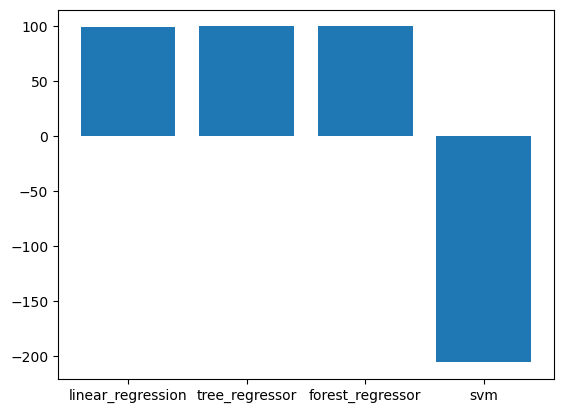

In [37]:
model_names = list(models.keys())
accuracy = list(map(float, models.values()))
# creating the bar plot
plt.bar(model_names, accuracy)

In [38]:
df_athlete.head()

,Team,Sex,Age,NOC,Games,Year,Sport,Event,Medal,AgeGroup,Total_Gold_Medals,Total_Silver_Medals,Total_Bronze_Medals,Total_Historical_Medals,Total_Medal_Value,Sponsorship
0,A North American Team,M,38.0,MEX,1900 Summer,1900,Polo,Polo Men's Polo,Bronze,35-39,0.0,0.0,4.0,4.0,4.0,0.000766
1,Afghanistan,M,21.0,AFG,2008 Summer,2008,Taekwondo,Taekwondo Men's Flyweight,Bronze,20-24,0.0,0.0,2.0,2.0,2.0,0.000383
2,Algeria,M,26.0,ALG,2000 Summer,2000,Boxing,Boxing Men's Light-Welterweight,Bronze,25-29,5.0,4.0,8.0,17.0,31.0,0.003257
3,Ali-Baba II,M,28.0,SWE,1948 Summer,1948,Sailing,Sailing Mixed 6 metres,Bronze,25-29,0.0,0.0,5.0,5.0,5.0,0.000958
4,Amateur Athletic Association,M,29.0,GBR,1900 Summer,1900,Athletics,"Athletics Men's 5,000 metres, Team",Gold,25-29,5.0,0.0,0.0,5.0,15.0,0.000958


In [39]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



# Select the feature for clustering (Total_Medal_Value)
X = df_athlete[['Total_Medal_Value']]

# Standardize the feature for better clustering results
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters
num_clusters = 3  # You may adjust this based on your understanding of the data

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_athlete['Cluster'] = kmeans.fit_predict(X_scaled)

# Display the clusters and corresponding sponsorship predictions
cluster_means = df_athlete.groupby('Cluster')['Total_Medal_Value'].mean().sort_values()
sponsorship_predictions = pd.DataFrame({'Cluster': cluster_means.index, 'Sponsorship_Prediction': range(1, num_clusters + 1)})
df_athlete = pd.merge(df_athlete, sponsorship_predictions, on='Cluster', how='left')

# Display the final DataFrame with predicted sponsorship
df_athlete[['Team', 'Total_Medal_Value', 'Cluster', 'Sponsorship_Prediction']]


/Users/bikram/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Team,Total_Medal_Value,Cluster,Sponsorship_Prediction
0,A North American Team,4.0,0,1
1,Afghanistan,2.0,0,1
2,Algeria,31.0,0,1
3,Ali-Baba II,5.0,0,1
4,Amateur Athletic Association,15.0,0,1
...,...,...,...,...
493,Winnipeg Shamrocks-1,36.0,0,1
494,Yugoslavia,817.0,0,1
495,Zambia,3.0,0,1
496,Zimbabwe,60.0,0,1


In [40]:
df_athlete.to_csv('output_file.csv', index=False)